<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;数据科学引论 - Python之道 </h1>

<h1, align=center> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;第8课 数据可视化 作业 - 星巴克:从西雅图到世界各地</h1>

#### 目录
1. [星巴克: 背景](#top)
1. [plotly库](#plotly)
1. [获得数据](#getdata)
1. [了解数据](#understand)

# 星巴克

<img src=https://upload.wikimedia.org/wikipedia/en/thumb/d/d3/Starbucks_Corporation_Logo_2011.svg/594px-Starbucks_Corporation_Logo_2011.svg.png width=100 align=left></img>


星巴克是一家起源于西雅图的美国咖啡公司。他们在世界各地经营着大型连锁咖啡店，拥有超过23000家分店，其中包括:
- 美国`>13000` 处
- 中国`>2700`处
- 加拿大`>1400`处 
- 日本`>1000`处 
- 韩国`>800`处

### 加载库

In [1]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline

#increase figure size
from pylab import rcParams
rcParams['figure.figsize'] = (14,10)

<a id="getdata"></a>
## 获得数据

数据由 [chrismeller](https://github.com/chrismeller/StarbucksScraper)爬取供大家使用. 数据集(starbucks.csv)也已被上传到IBM Box，以方便本教程.

下载数据

In [41]:
#linux !wget --output-document /resources/data/starbucks.csv https://ibm.box.com/shared/static/o6yl1g9z9nmzl6asf4abby5gvsrjeqk3.csv
#自行下载

#### 读入数据:

创建一个变量 **`df`** 读入 **`starbucks.csv`** 内的数据.

In [2]:
df = pd.read_csv('resources/data/starbucks.csv')

<a id="understand"></a>
## 了解数据

#### 查看数据前几行:

In [3]:
df.head(10)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51
5,Starbucks,17688-182164,"Dalma Mall, Ground Floor",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
6,Starbucks,18182-182165,"Dalma Mall, Level 1",Licensed,"Dalma Mall, Mussafah",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.49,24.40
7,Starbucks,23359-229184,Debenhams Yas Mall,Licensed,Yas Island,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.61,24.46
8,Starbucks,30781-99022,Khalidiya Street,Licensed,Khalidiya St.,Abu Dhabi,AZ,AE,NaN,26670052,GMT+04:00 Asia/Muscat,55.69,24.19
9,Starbucks,20423-205465,Eastern Mangroves,Licensed,"Al Salam Street, The Mangroves",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48


#### 数据中一共有几处地点?

In [4]:
address = len(df['Street Address'].unique())
city = len(df['City'].unique())
state_province = len(df['State/Province'].unique())
country = len(df['Country'].unique())
print('数据中的星巴克分店覆盖%d个国家，%d个州/省，%d个城市，%d处街道'%(country,state_province,city,address))

数据中的星巴克分店覆盖73个国家，338个州/省，5470个城市，25354处街道


#### 美国有几家分店?

In [5]:
US_store_num = len(df[df['Country']=='US'])
print('美国有%d家分店'%(US_store_num))

美国有13608家分店


#### 中国有几家分店?

In [9]:
CN_store_num = len(df[df['Country']=='CN'])
print('中国有%d家分店'%(CN_store_num))

中国有2734家分店


In [10]:
CN_store_num = len(df[(df['Country']=='CN') | (df['Country']=='TW')])
print('中国有%d家分店'%(CN_store_num))

中国有3128家分店


#### 在地图上绘制出每家中国分店

In [11]:
CN_store = df[(df['Country']=='CN') | (df['Country']=='TW')]

In [84]:
CN_store_cityagg = CN_store.groupby('City').agg(['mean','count'])

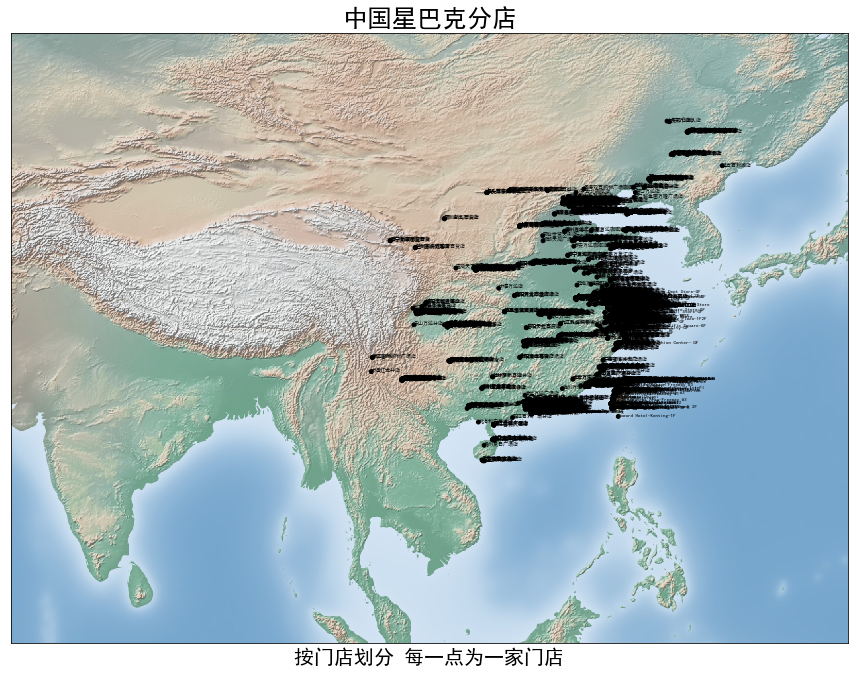

In [101]:
plt.rcParams['font.sans-serif']=['SimHei']

lat = np.array(CN_store["Latitude"])
lon = np.array(CN_store["Longitude"])
size = np.array([1 for i in lat])*15
City = CN_store["Store Name"]

plt.figure(figsize=(15,15))

# bmap = Basemap(projection='stere', 
#               lat_0=35, lon_0=110,
#               llcrnrlon=82.33, 
#               llcrnrlat=3.01, 
#               urcrnrlon=138.16, 
#               urcrnrlat=53.123,resolution='l',area_thresh=10000,rsphere=6371200.)
bmap = Basemap(
            llcrnrlon=70, llcrnrlat=3, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=140, urcrnrlat=54) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# 绘制地图国界等
# bmap.drawcoastlines()   
# bmap.drawcountries()    
# bmap.drawcounties()
# bmap.drawmapboundary()

# 绘制经纬基准线
# parallels = np.arange(0.,90,10.) 
# bmap.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# meridians = np.arange(80.,140.,10.)
# bmap.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

x,y = bmap(lon,lat)
bmap.scatter(x,y,marker='o',s=size,c=[(-i/max(size)+1,0,0) for i in size] )
for x_, y_, city in zip(x,y,City):
    plt.text(x_, y_, city,fontsize=5)
# bmap.plot(  y, 
#             x,
#             markerfacecolor = 'blue',  #blue, green, or even (R,G,B)
#             marker='o', 
#             markersize= 10*2, 
#             alpha = 0.75)

plt.title("中国星巴克分店",fontsize=25)
plt.xlabel("按门店划分 每一点为一家门店",fontsize=20)
bmap.shadedrelief()
plt.show()

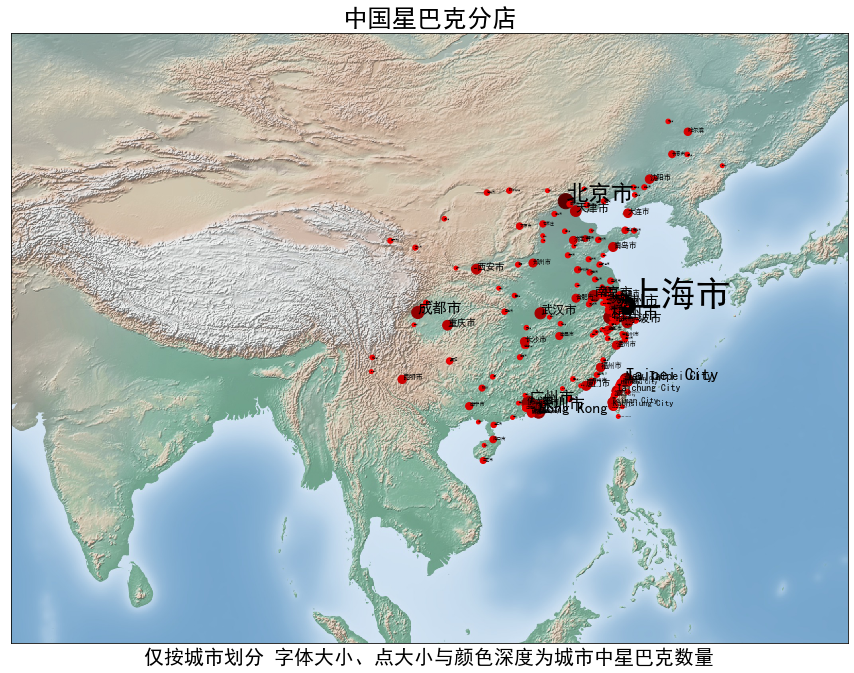

In [109]:
plt.rcParams['font.sans-serif']=['SimHei']

lat = np.array(CN_store_cityagg["Latitude"]["mean"])
lon = np.array(CN_store_cityagg["Longitude"]["mean"])
City = np.array(CN_store_cityagg.index)
size = np.array(CN_store_cityagg["Latitude"]["count"])**0.5*15

plt.figure(figsize=(15,15))

# bmap = Basemap(projection='stere', 
#               lat_0=35, lon_0=110,
#               llcrnrlon=82.33, 
#               llcrnrlat=3.01, 
#               urcrnrlon=138.16, 
#               urcrnrlat=53.123,resolution='l',area_thresh=10000,rsphere=6371200.)
bmap = Basemap(
            llcrnrlon=70, llcrnrlat=3, #min longitude (llcrnrlon) and latitude (llcrnrlat)
            urcrnrlon=140, urcrnrlat=54) #max longitude (urcrnrlon) and latitude (urcrnrlat)

# 绘制地图国界等
# bmap.drawcoastlines()   
# bmap.drawcountries()    
# bmap.drawcounties()
# bmap.drawmapboundary()

# 绘制经纬基准线
# parallels = np.arange(0.,90,10.) 
# bmap.drawparallels(parallels,labels=[1,0,0,0],fontsize=10)
# meridians = np.arange(80.,140.,10.)
# bmap.drawmeridians(meridians,labels=[0,0,0,1],fontsize=10)

x,y = bmap(lon,lat)
bmap.scatter(x,y,marker='o',s=size,c=[(-i/max(size)+1,0,0) for i in size] )
for x_, y_, city, each_size in zip(x,y,City,size):
    plt.text(x_, y_, city,fontsize=each_size/10)

plt.title("中国星巴克分店",fontsize=25)
plt.xlabel("仅按城市划分 字体大小、点大小与颜色深度为城市中星巴克数量",fontsize=20)
bmap.shadedrelief()
plt.show()